# Task 3P: Analyze BMI and explore correlations between height, weight, arm circumference, waist circumference, and hip circumference.

## Shouvanik Sarkar, Student ID: 225174439, email id: s225174439@deakin.edu.au

In [34]:
import matplotlib.pyplot as plt
import numpy as np

Here we are downloading the dataset and loading them in male and female arrays. 

In [134]:
female =  np.genfromtxt('nhanes_adult_female_bmx_2020.csv', delimiter=',', comments='#')
male =    np.genfromtxt('nhanes_adult_male_bmx_2020.csv', delimiter=',', comments='#')
male,female

(array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [ 98.8, 182.3,  42. , ...,  38.2, 108.2, 120.4],
        [ 74.3, 184.2,  41.1, ...,  30.2,  94.5,  86.8],
        ...,
        [108.8, 168.7,  38.6, ...,  33.6, 118. , 114.7],
        [ 79.5, 176.4,  39.5, ...,  31.4,  99.8,  97.1],
        [ 59.7, 167.5,  40.3, ...,  29.2,  90.5,  86.9]]),
 array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [ 97.1, 160.2,  34.7, ...,  35.8, 126.1, 117.9],
        [ 91.1, 152.7,  33.5, ...,  38.5, 125.5, 103.1],
        ...,
        [ 73. , 159.6,  36.2, ...,  31.4, 104.6,  99.3],
        [ 78.6, 168.5,  38.1, ...,  36. , 102.4,  98.5],
        [ 82.8, 147.8,  34.8, ...,  39.5, 121.4, 110. ]]))

In [135]:
female = female[1:]
male = male[1:]

Here we are removing the first row as its loaded with not a number. After Removing, our dataset looks like below. male and female respectively. 

In [21]:
male,female

(array([[ 98.8, 182.3,  42. , ...,  38.2, 108.2, 120.4],
        [ 74.3, 184.2,  41.1, ...,  30.2,  94.5,  86.8],
        [103.7, 185.3,  47. , ...,  32. , 107.8, 109.6],
        ...,
        [108.8, 168.7,  38.6, ...,  33.6, 118. , 114.7],
        [ 79.5, 176.4,  39.5, ...,  31.4,  99.8,  97.1],
        [ 59.7, 167.5,  40.3, ...,  29.2,  90.5,  86.9]]),
 array([[ 97.1, 160.2,  34.7, ...,  35.8, 126.1, 117.9],
        [ 91.1, 152.7,  33.5, ...,  38.5, 125.5, 103.1],
        [ 73. , 161.2,  37.4, ...,  31.8, 106.2,  92. ],
        ...,
        [ 73. , 159.6,  36.2, ...,  31.4, 104.6,  99.3],
        [ 78.6, 168.5,  38.1, ...,  36. , 102.4,  98.5],
        [ 82.8, 147.8,  34.8, ...,  39.5, 121.4, 110. ]]))

BMI is given as 
$$
\text{BMI} = \frac{\text{weight (kg)}}{\text{height (m)}^2}
$$
Below we will be calculating BMI for the male and female datasets. Weight is provided in kg, so no changes required. But height is provided in 'cm' in dataset, so we will be dividing by 100 to transform it to 'mtrs'. 
With that said, we are dividing 1st column(index 0) with second column(index 1) square. 

In [136]:
f_bmi =female[:, 0] / (female[:, 1]/100) ** 2
m_bmi = male[:, 0] / (male[:, 1]/100) ** 2
female = np.column_stack((female, f_bmi))
male = np.column_stack((male, m_bmi))

Above once, BMI is calculated, we have stacked with the original dataset for further checks and observations. 
Below command to check the first row of each dataset male and female along with BMI the 8th column. 

In [137]:
female[1, :] ,male[1, :] 

(array([ 91.1         , 152.7         ,  33.5         ,  33.          ,
         38.5         , 125.5         , 103.1         ,  39.0697203663]),
 array([ 74.3         , 184.2         ,  41.1         ,  41.          ,
         30.2         ,  94.5         ,  86.8         ,  21.8982576886]))

### To analyze further, lets draw two histograms for male BMIs (top subfigure) and for female BMIs (bottom subfigure) one below another.
Here we have subdivided the plots in 20 bins and taken the limits as minimum of whichever BMI is less (male or female) and similarly taken the maximum of whichever BMI is more. 
To keep the plots in identical limits for male and females and so we can understand under the same scale, how the BMI bares for each gender.

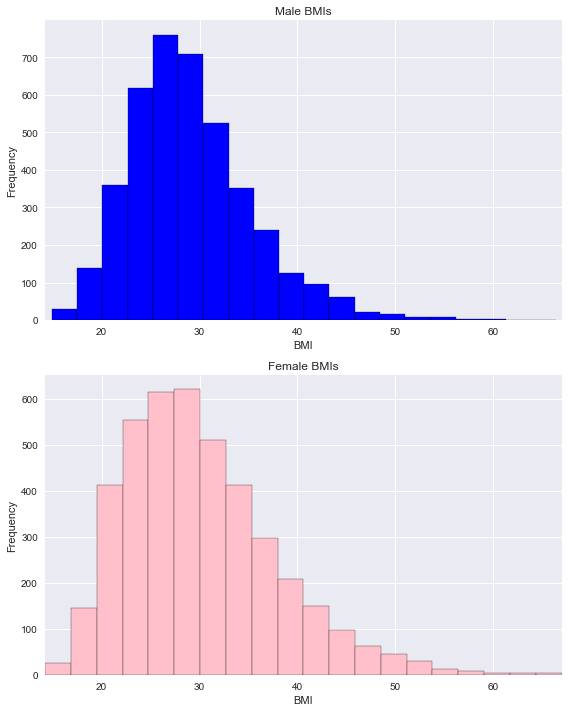

In [109]:
fig, axs = plt.subplots(2, 1, figsize=(8, 10))  # 2 rows, 1 column
# Plot histogram for male BMIs (top subplot)
axs[0].hist(male[:, 7], bins=20, color='blue', edgecolor='black')
axs[0].set_title('Male BMIs')
axs[0].set_xlabel('BMI')
axs[0].set_ylabel('Frequency')
# Plot histogram for female BMIs (below subplot)
axs[1].hist(female[:, 7], bins=20, color='pink', edgecolor='black')
axs[1].set_title('Female BMIs')
axs[1].set_xlabel('BMI')
axs[1].set_ylabel('Frequency')
#use xlim
min_bmi = min(np.min(male[:, 7]), np.min(female[:, 7]))
max_bmi = max(np.max(male[:, 7]), np.max(female[:, 7]))
axs[0].set_xlim([min_bmi, max_bmi])
axs[1].set_xlim([min_bmi, max_bmi])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Similarly, lets draw box and whisker plots for male BMIs and for female BMIs one below another in the same scale. 

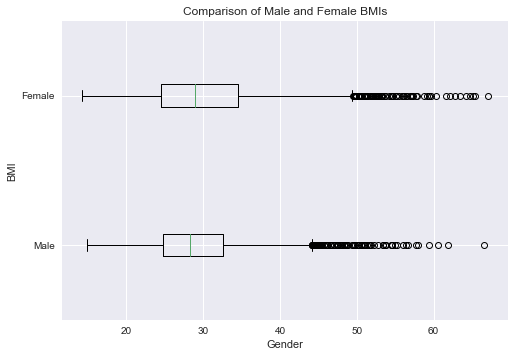

In [138]:
plt.boxplot([male[:, 7], female[:, 7]], labels=['Male', 'Female'],vert=False )

# Add title and labels
plt.title('Comparison of Male and Female BMIs')
plt.xlabel('Gender')
plt.ylabel('BMI')

# Show the plot
plt.show()

In [58]:
import scipy.stats

### Below we will compute the basic numerical aggregates of the male and female BMIs (measures of location,dispersion, and shape)
we will be using the basic numpy functions to get to the aggregate values and will use scipy stats value to get Skewness for each of the dataset. 
the values for both the dataset Female and Male are given, respectively. 

In [142]:
print("                 ", "Female","  ", "Male")
print("##      BMI Mean:" ,round(np.mean(female[:, 7]),2) , "    ",round(np.mean(male[:, 7]),2))
print("##        Median:" ,round(np.median(female[:, 7]),2) ,"   ",round(np.median(male[:, 7]),2))
print("##       Minimum:" ,round(np.min(female[:, 7]),2) ,"    ",round(np.min(male[:, 7]),2))
print("##       Maximum:" ,round(np.max(female[:, 7]),2) ,"   ",round(np.max(male[:, 7]),2))
print("## Std Deviation:" ,round(np.std(female[:, 7],ddof =1),2) ,"    ",round(np.std(male[:, 7],ddof =1),2))
print("##           IQR:" ,round(np.quantile(female[:, 7],0.75) - np.quantile(female[:, 7],0.25) ,2),"   ",round(np.quantile(male[:, 7],0.75) - np.quantile(male[:, 7],0.25) ,2))
print("##      Skewness:" ,round(scipy.stats.skew(female[:, 7]),2),"    ",round(scipy.stats.skew(male[:, 7]),2))

                  Female    Male
##      BMI Mean: 30.1      29.14
##        Median: 28.89     28.27
##       Minimum: 14.2      14.91
##       Maximum: 67.04     66.5
## Std Deviation: 7.76      6.31
##           IQR: 10.01     7.73
##      Skewness: 0.92      0.97


1. **From the above aggregation values, we can clearly see:**
   - a. BMI Mean for Female is more than Male.
   - b. Median is higher as well for Female compared to Male.
   - c. Minimum value for Female is slightly lower than Male.
   - d. Maximum value for Female is higher compared to Male.
   - e. Standard Deviation is higher for Female compared to Male. So there is more dispersion compared to Male BMI.
   - f. Female BMI has bigger middle range compared to Males which is why IQR is more as well.
   - g. Both skews are tending to 1 which means, they are right skewed.

2. **Based on box and whisker plot, we can clearly see:**
   - a. We have multiple outliers for both Female and Male.
   - b. Although Mean is almost same for both Female and Male, Female is bit higher. (as stated above)
   - c. IQR is spread broader in length for Female compared to Male.
   - d. We have more Females with higher BMI as compared to Male.

3. **From Histogram plots, we can clearly see:**
   - a. Both the distributions are right skewed.
   - b. The tail is longer for Females as compared to Male dataset.
   - c. Females have slightly higher BMI compared to Male.


In [81]:
import seaborn as sns

### Now lets draw scatterplot matrix (pairplot) for the male dataset for heights, weights, waist circumferences, hip circumferences, and BMIs
Below first we are defining a function which will draw a scatter plot or pair plot against the mentioned columns for Male Dataset. Each of the columns as mentioned above will be plotted against each of the other columns to see and understand the correlation between them


In [155]:
def pairplot(X, labels, bins=21, alpha=0.1):
    """
    Draws a scatter plot matrix, given:
    * X - data matrix,
    * labels - list of column names
    """
    assert X.shape[1] == len(labels)

    k = X.shape[1]
    fig, axes = plt.subplots(nrows=k, ncols=k, sharex="col", sharey="row",
        figsize=(plt.rcParams["figure.figsize"][0], )*2)
    
    for i in range(k):
        for j in range(k):
            ax = axes[i, j]
            if i == j:  # diagonal
                ax.text(0.5, 0.5, labels[i], transform=ax.transAxes,
                    ha="center", va="center", size="x-small")
            else:
                ax.plot(X[:, j], X[:, i], ".", color="black", alpha=alpha)

In [144]:
body_columns = np.array([
    "weight (kg)",
    "height (cm)",
    "upper arm length (cm)",
    "upper leg length (cm)",
    "arm circumference (cm)",
    "hip  (cm)",
    "waist (cm)",
    "BMI",
])

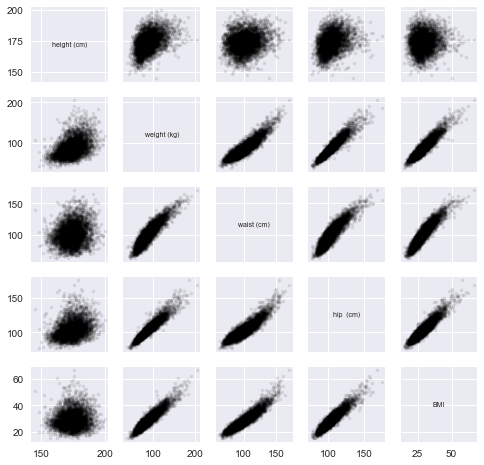

In [156]:
which = [1, 0, 6, 5,7]
pairplot(male[:, which], body_columns[which])
plt.show()

Let us also plot Pearson's r and Spearman's $\rho$ one after another to check for correlation coefficient and Monotonic correlation

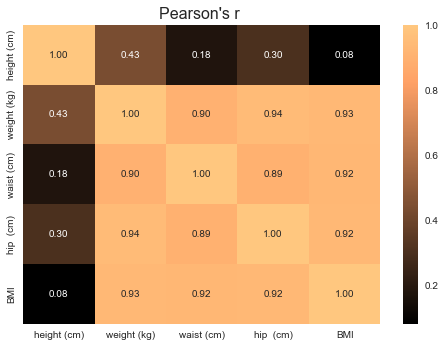

In [105]:
from matplotlib import cm
order = [1, 0, 6, 5,7]
C = np.corrcoef(male.T)
sns.heatmap(
    C[np.ix_(order, order)],
    xticklabels=body_columns[order],
    yticklabels=body_columns[order],
    annot=True, fmt=".2f", cmap=cm.get_cmap("copper")
)
plt.title("Pearson's r ", fontsize=16)
plt.show()

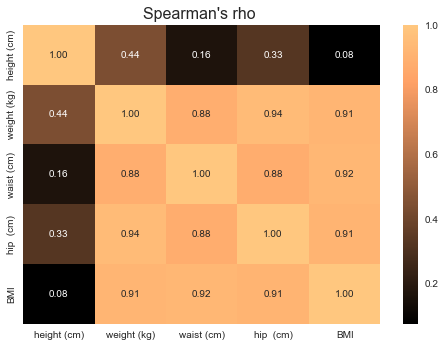

In [158]:
order = [1, 0, 6, 5,7]
C = np.corrcoef(scipy.stats.rankdata(male,axis = 0).T)
sns.heatmap(
    C[np.ix_(order, order)],
    xticklabels=body_columns[order],
    yticklabels=body_columns[order],
    annot=True, fmt=".2f", cmap=cm.get_cmap("copper")
)
plt.title("Spearman's rho ", fontsize=16)
plt.show()

1. **Based on Pair Plot, we can clearly see:**
    - a. Weights, waist circumferences, hip circumferences, and BMIs have almost Linear relationship with each other. 
    - b. Heights doesn have linear relationship with either of the mentioned columns. And its a bit scattered.
2. **From Pearson's R, we can clearly see:**
    - a. Weight is highly correlated with Waist, Hip and BMI. with correlation ranging from 0.90 to 0.94
    - b. Similarly, waist is also highly correlated with hip, weight and BMI. with correlation ranging from 0.89 to 0.94
    - c. similar hip and BMI are also highly correlated with the other features except height. 
    - d. Height is not correlated with either of the weight, waist hip or BMI features which we also saw in scatter plot. 
3. **From Spearman's Rho, we can see:**
    - a. For features- weights, waist circumferences, hip circumferences, and BMIs, they are monotonic and they range between 0.88 to 0.94. 
    - b. These provides why we were able to see Linear relationship between the mentioned columns in the dataset. 
    - c. Height when checked, we can see it was scattered in the pair plot and in spearman's rho it shows very less monotonic correlated. 
    
**We can say, height and other features doesnot have strong relationship compared to others.**

In [113]:
mean_male = male.mean(axis=0)  # Mean of each column
std_male = male.std(axis=0,ddof =1)    # Standard deviation of each column

### Standardisation
Lets now standardise the values by computing the z-scores. given by below formula:
$$Z = \frac{x - \mu}{\sigma},
 where \mu : mean ,\
 \sigma : std\$$
 we are subtracting mean and dividing by standard deviation through out the data set for each of the columns which are as computed above for each column

In [117]:
zmale = (male - mean_male) / std_male
print(zmale[:5])

[[ 0.4871473553  1.1057842552  1.1432574353 -0.3860920491  0.8077890453
   0.303385938   1.1251335681  0.0928396542]
 [-0.6565601229  1.3537480166  0.773796595  -0.1061438728 -0.8638658792
  -0.8184760552 -0.9062097017 -1.1476418722]
 [ 0.715888851   1.4973059838  3.195817659   0.8270167149 -0.4877435212
   0.2706308433  0.4722018028  0.167644626 ]
 [-0.1103814497 -0.7865707664  0.1169773234 -0.9148830488 -1.1146141179
   0.1559880119  0.3936081644  0.22177894  ]
 [ 0.515156518   1.0144291851  0.4864381637 -0.4483027549  0.3480839411
   1.2860387788  0.315014526   0.1580350015]]


Plotting the pair plot on the new standardised dataset, we can see the plot remained same, but the scale changed from -2.5 to 2.5 rather than initially it was between 0-200. 
So the properties of the features or columns remained same. 

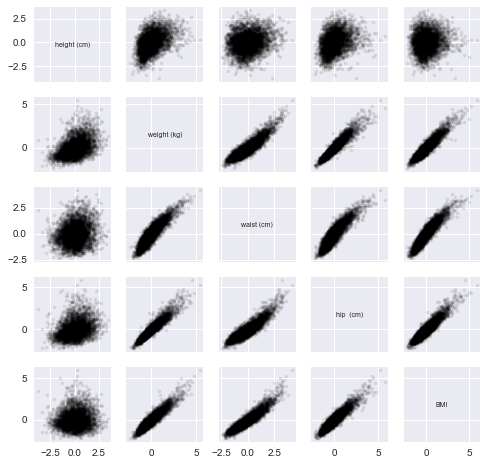

In [118]:
which = [1, 0, 6, 5,7]
pairplot(zmale[:, which], body_columns[which])
plt.show()

Let us also re-plot Pearson's r and Spearman's  𝜌
  one after another on the standardised dataset to check for correlation coefficient and Monotonic correlation, if the values changed after standardisation compared to initial dataset. 
    and we can see there are no differences as we are only shifting and scaling of data

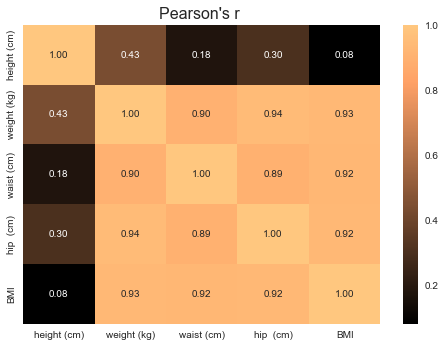

In [119]:
from matplotlib import cm
order = [1, 0, 6, 5,7]
C = np.corrcoef(zmale.T)
sns.heatmap(
    C[np.ix_(order, order)],
    xticklabels=body_columns[order],
    yticklabels=body_columns[order],
    annot=True, fmt=".2f", cmap=cm.get_cmap("copper")
)
plt.title("Pearson's r ", fontsize=16)
plt.show()

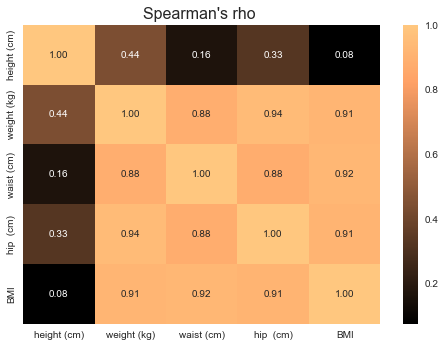

In [120]:
order = [1, 0, 6, 5,7]
C = np.corrcoef(scipy.stats.rankdata(zmale,axis = 0).T)
sns.heatmap(
    C[np.ix_(order, order)],
    xticklabels=body_columns[order],
    yticklabels=body_columns[order],
    annot=True, fmt=".2f", cmap=cm.get_cmap("copper")
)
plt.title("Spearman's rho ", fontsize=16)
plt.show()

## Inference
**We saw multiple things after analysing the dataset:**
1. We saw, Female BMI is slightly higher than Male BMI. 
2. Female BMI is also more right skewed compared to Male BMI.
3. Female BMI is more distributed compared to Male BMI and hence IQR of Female is slightly higher. 

**Then on analysisng further on Male BMI, we saw:**
1. Height is not correlated with Weight,Waist Circumference, Hip Circumference or BMI. 
2. But Weight, waist Circumference, Hip Circumference, and BMI are highly correlated and are in linear relationship. 
3. We also checked for the Montonic correlation, and it shows similar properties as from Pearson's r co-efficent. 